<a href="https://colab.research.google.com/github/alexlee-gk/slac/blob/master/data/dm_control_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
%%bash
# download data directory if it doesn't exist
if [ ! -d "data" ]; then
  wget https://github.com/alexlee-gk/slac/archive/master.zip
  unzip master.zip
  mv slac-master/data ./
  rm -r master.zip slac-master
fi

In [3]:
def read_df_slac(env_name, expected_num_trials=10):
  fname = f'data/slac/dm_control_{env_name}_slac.csv'
  with open(fname, 'r') as f:
    df = pd.read_csv(f)
  # decoder variance hyperparameter that achieves the best per-task average 
  # return across trials averaged over the first half a million environment 
  # steps
  df_mean = df[df["OriginalEnvironmentSteps"] < 5e5].groupby(
      "decoder_var").mean()
  best_decoder_var = df_mean.idxmax().get("AverageReturnEvalPolicy")
  df = df[df["decoder_var"] == best_decoder_var]
  assert len(df['trial_id'].unique()) == expected_num_trials
  df['OriginalEnvironmentStepMillions'] = df['OriginalEnvironmentSteps'] / 1e6
  return df

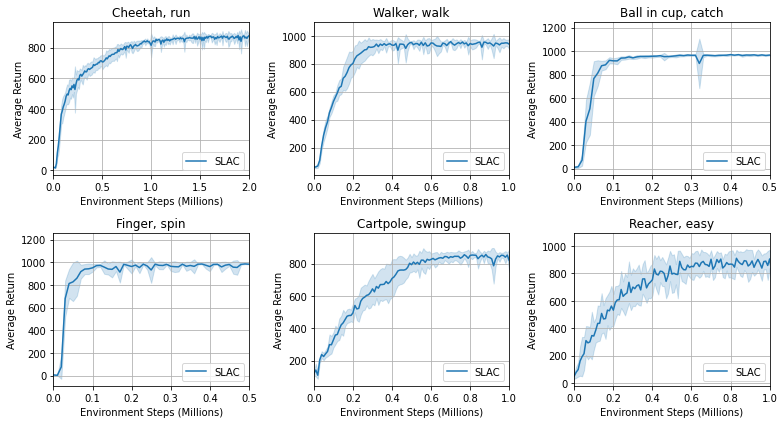

In [4]:
env_name_to_title = {
    'cheetah_run': 'Cheetah, run',
    'walker_walk': 'Walker, walk' ,
    'ball_in_cup_catch': 'Ball in cup, catch',
    'finger_spin': 'Finger, spin',
    'cartpole_swingup': 'Cartpole, swingup',
    'reacher_easy': 'Reacher, easy',
}
env_name_to_xlim = {
    'cheetah_run': 2,
    'walker_walk': 1,
    'ball_in_cup_catch': 0.5,
    'finger_spin': 0.5,
    'cartpole_swingup': 1,
    'reacher_easy': 1,
}

fig, axs = plt.subplots(2, 3, figsize=(11, 6))
for env_name, ax in zip(env_name_to_title, axs.flat):
  data = read_df_slac(env_name)
  sns.lineplot(x='OriginalEnvironmentStepMillions', y='AverageReturnEvalPolicy',
               data=data, ci='sd', label='SLAC', ax=ax)
  ax.grid()
  ax.set_title(env_name_to_title[env_name])
  ax.set_xlabel('Environment Steps (Millions)')
  ax.set_ylabel('Average Return')
  ax.set_xlim(0, env_name_to_xlim[env_name])
fig.tight_layout()